<a href="https://colab.research.google.com/github/Sebastiao199/Project3MRS/blob/main/Filter_5_percent_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

Tables used:

In [ ]:
title_ratings = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', sep = '\t') #columns: tconst, averageRating, numVotes
name_basics = pd.read_csv('https://datasets.imdbws.com/name.basics.tsv.gz', sep = '\t') #columns: nconst, primaryName, birthYear, deathYear, primaryProfession, knownForTitles

#Pickle (cleaned tables):
#title_principals = pd.read_pickle('/content/drive/MyDrive/Data Analyst/WCS/Project 3/df_titleprincipals2.pickle') #columns: tconst, nconst
#title_basics = pd.read_pickle('/content/drive/MyDrive/Data Analyst/WCS/Project 3/df_titlebasicsv2.pickle')


Import tables from pickle:

In [ ]:
df_principals = pd.read_pickle('/content/drive/MyDrive/Data Analyst/WCS/Project 3/df_titleprincipals2.pickle')
#df_principals.shape (35 893 496, 3)

In [ ]:
df_titlebasics = pd.read_pickle('/content/drive/MyDrive/Data Analyst/WCS/Project 3/df_titlebasicsv2.pickle')
#df_titlebasics.shape (763 347, 7)

In [ ]:
#title_ratings.shape (1 241 487, 3)

In [ ]:
#name_basics.shape (12035112, 6))

Merge: principals w/ titlebasics w/ ratings w/ name basics

In [ ]:
titlebasics_principals= df_titlebasics.merge(df_principals, how='left', left_on='tconst', right_on='tconst')

In [ ]:
titlebasics_principals_ratings=titlebasics_principals.merge(title_ratings, how='left', left_on='tconst', right_on='tconst')

In [ ]:
name_basics_v2 = name_basics.drop(['knownForTitles', 'primaryProfession'], axis=1)
titlebasics_principals_ratings_names = titlebasics_principals_ratings.merge(name_basics_v2, how='left', left_on='nconst', right_on='nconst')

Drops / Cleaning

In [ ]:
condition = titlebasics_principals_ratings_names['genres'].str.contains('Film-Noir' or 'Game-Show' or 'News' or 'Reality-TV' or 'Short' or 'Talk-Show' ) == False
titlebasics_principals_ratings_names_4 = titlebasics_principals_ratings_names.loc[condition, :]
titlebasics_principals_ratings_names_5 = titlebasics_principals_ratings_names_4[titlebasics_principals_ratings_names_4['genres'] != "\\N"]
titlebasics_principals_ratings_names_6 = titlebasics_principals_ratings_names_5.drop(['birthYear', 'deathYear'], axis=1)
titlebasics_principals_ratings_names_7 = titlebasics_principals_ratings_names_6.dropna(subset=['averageRating'])
titlebasics_principals_ratings_names_8 = titlebasics_principals_ratings_names_7.drop(titlebasics_principals_ratings_names_7[titlebasics_principals_ratings_names_7['titleType']=='tvMovie'].index)
titlebasics_principals_ratings_names_9 = titlebasics_principals_ratings_names_8.dropna(subset=['numVotes'])

Table with all actors, actress, directors and genres, from all movies (included the ones without numVotes)

In [ ]:
#titlebasics_principals_ratings_names_8.to_csv('ppl_names_allmovies.csv')
#titlebasics_principals_ratings_names_8.to_pickle('ppl_names_allmovies.csv')

In [ ]:
titlebasics_principals_ratings_names_9.head()

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,nconst,category,averageRating,numVotes,primaryName
0,tt0000009,movie,Miss Jerry,1894,45,Romance,nm0063086,actress,5.2,200.0,Blanche Bayliss
1,tt0000009,movie,Miss Jerry,1894,45,Romance,nm0183823,actor,5.2,200.0,William Courtenay
2,tt0000009,movie,Miss Jerry,1894,45,Romance,nm1309758,actor,5.2,200.0,Chauncey Depew
3,tt0000009,movie,Miss Jerry,1894,45,Romance,nm0085156,director,5.2,200.0,Alexander Black
7,tt0000574,movie,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",nm0846887,actress,6.0,794.0,Elizabeth Tait


In [ ]:
titlebasics_principals_ratings_names_9['numVotes'] > 6096
tprn_9=titlebasics_principals_ratings_names_9.loc[titlebasics_principals_ratings_names_9['numVotes'] > 6096, :]

In [ ]:
tprn_10=tprn_9.drop(["runtimeMinutes", "titleType"],axis=1)
tprn_10.head()

,tconst,primaryTitle,startYear,genres,nconst,category,averageRating,numVotes,primaryName
4316,tt0004972,The Birth of a Nation,1915,"Drama,History,War",nm0001273,actress,6.2,24939.0,Lillian Gish
4317,tt0004972,The Birth of a Nation,1915,"Drama,History,War",nm0550615,actress,6.2,24939.0,Mae Marsh
4318,tt0004972,The Birth of a Nation,1915,"Drama,History,War",nm0910400,actor,6.2,24939.0,Henry B. Walthall
4319,tt0004972,The Birth of a Nation,1915,"Drama,History,War",nm0178270,actress,6.2,24939.0,Miriam Cooper
4320,tt0004972,The Birth of a Nation,1915,"Drama,History,War",nm0000428,director,6.2,24939.0,D.W. Griffith


In [ ]:
tprn_10_1=tprn_10.sort_values('numVotes', ascending=False)
tprn_10_2=tprn_10_1.head(1000)
#tprn_10_2=tprn_10_1

In [ ]:
# rename column
# tprn_11=tprn_10.rename(columns={'primaryName': 'Staff name', 'averageRating': 'IMDb rating', 'primaryTitle': 'Movie title', 'startYear': 'Year', 'numVotes':'Nb votes', 'genres':'Genres'}, inplace=True, errors='raise')

In [ ]:
#tprn_11.to_csv('tprn_10.csv')

In [ ]:
#Best 10 actors from 1000 more voted movies (higher num votes)
t_p_r_n_13=tprn_10_2.groupby(['nconst', 'category', 'primaryName']).agg({'averageRating':'mean', 'primaryTitle':'count'})
t_p_r_n_14=t_p_r_n_13.reset_index()

In [ ]:
condition1=t_p_r_n_14['category']=='actress'
condition2=t_p_r_n_14['category']=='actor'
t_p_r_n_15_nm=t_p_r_n_14.loc[(condition1 | condition2), :].sort_values('primaryTitle', ascending=False)
t_p_r_n_15_nm.head(10)
#t_p_r_n_15['category'].value_counts()

#Description: This table shows the 10 actors/actresses, that have more participations on the 1000 more voted movies from our data set (5% of the total number of movies)
#Streamlit filters: Actor/Actress ; top 10 or 20 or 30 // plots: barplot with nr movies
#Why: In case we admit the movies with more votes are the ones with more visualizations, this analysis can predict which actors will sell more cinema tickets.

,nconst,category,primaryName,averageRating,primaryTitle
97,nm0000375,actor,Robert Downey Jr.,7.680000,10
5,nm0000093,actor,Brad Pitt,8.044444,9
22,nm0000138,actor,Leonardo DiCaprio,8.188889,9
56,nm0000204,actress,Natalie Portman,7.400000,8
366,nm0262635,actor,Chris Evans,7.812500,8
297,nm0005212,actor,Ian McKellen,8.200000,7
28,nm0000148,actor,Harrison Ford,8.383333,6
327,nm0089217,actor,Orlando Bloom,8.183333,6
36,nm0000158,actor,Tom Hanks,8.450000,6
39,nm0000168,actor,Samuel L. Jackson,7.816667,6


In [ ]:
#Men table - new column (men ranking) - rating(film) divided by max rating
condition = t_p_r_n_15_nm['category'] == 'actor'
t_p_r_n_15_masc=t_p_r_n_15_nm.loc[condition, :]

t_p_r_n_15_masc['ranking']=t_p_r_n_15_masc['primaryTitle'] / t_p_r_n_15_masc['primaryTitle'].max()
t_p_r_n_15_masc.head()
t_p_r_n_15_masc.shape


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(361, 6)

In [ ]:
#Women table - new column (women ranking) - rating(film) divided by max rating
condition = t_p_r_n_15_nm['category'] == 'actress'
t_p_r_n_15_fem=t_p_r_n_15_nm.loc[condition, :]
t_p_r_n_15_fem['ranking']=t_p_r_n_15_fem['primaryTitle'] / t_p_r_n_15_fem['primaryTitle'].max()
t_p_r_n_15_fem['ranking']=round(t_p_r_n_15_fem['ranking'], 1)
t_p_r_n_15_fem.head(10)

t_p_r_n_15_fem.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(153, 6)

In [ ]:
#Concat table masc with table fem
t_p_r_n_16_rat = pd.concat([t_p_r_n_15_masc, t_p_r_n_15_fem])
t_p_r_n_17_rat=t_p_r_n_16_rat.sort_values('ranking', ascending=False)
t_p_r_n_18_rat=t_p_r_n_17_rat.rename(columns={'primaryName': 'Staff name', 'averageRating': 'IMDb rating', 'primaryTitle': 'Nb movies', 'ranking':'Ranking'})
t_p_r_n_18_rat.head(20)

,nconst,category,Staff name,IMDb rating,Nb movies,Ranking
97,nm0000375,actor,Robert Downey Jr.,7.680000,10,1.0
56,nm0000204,actress,Natalie Portman,7.400000,8,1.0
22,nm0000138,actor,Leonardo DiCaprio,8.188889,9,0.9
5,nm0000093,actor,Brad Pitt,8.044444,9,0.9
366,nm0262635,actor,Chris Evans,7.812500,8,0.8
297,nm0005212,actor,Ian McKellen,8.200000,7,0.7
28,nm0000148,actor,Harrison Ford,8.383333,6,0.6
327,nm0089217,actor,Orlando Bloom,8.183333,6,0.6
36,nm0000158,actor,Tom Hanks,8.450000,6,0.6
39,nm0000168,actor,Samuel L. Jackson,7.816667,6,0.6


In [ ]:
#t_p_r_n_18_rat.to_csv('bestactors.csv')

In [ ]:
#Best 10 actors from 1000 more voted movies (sorted by higher average rating)
condition1=t_p_r_n_14['category']=='actress'
condition2=t_p_r_n_14['category']=='actor'
t_p_r_n_15_rat=t_p_r_n_14.loc[(condition1 | condition2), :].sort_values('averageRating', ascending=False)
t_p_r_n_15_rat.head(10)
#t_p_r_n_15['category'].value_counts()

#Description: This table shows the 10 actors, that have the best average rating on the 1000 more voted movies from our data set (5%)
#Why: I think this is not usefull because, since benefit the actors that have only participated on the best rated movie.  

,nconst,category,primaryName,averageRating,primaryTitle
58,nm0000209,actor,Tim Robbins,9.3,1
309,nm0006669,actor,William Sadler,9.3,1
397,nm0348409,actor,Bob Gunton,9.3,1
192,nm0001001,actor,James Caan,9.2,1
123,nm0000473,actress,Diane Keaton,9.1,2
206,nm0001173,actor,Aaron Eckhart,9.0,1
175,nm0000842,actor,Martin Balsam,9.0,1
271,nm0002011,actor,Lee J. Cobb,9.0,1
293,nm0005132,actor,Heath Ledger,9.0,1
1,nm0000020,actor,Henry Fonda,9.0,1


Table with movies per line

In [ ]:
titlebasics_principals_ratings_names_10 = titlebasics_principals_ratings_names_9[['tconst', 'startYear','runtimeMinutes','genres','averageRating','numVotes']]
titlebasics_principals_ratings_names_11 = titlebasics_principals_ratings_names_10.drop_duplicates()

In [ ]:
t_p_r_n_11 = titlebasics_principals_ratings_names_11 #271 269 total movies
t_p_r_n_11.head(10)
t_p_r_n_11.shape

(271792, 6)

In [ ]:
# t_p_r_n_11
# df_titlebasics

df_ml = pd.merge(t_p_r_n_11, df_titlebasics, how='inner', on='tconst')
df_ml.shape

df_ml.drop(['titleType','startYear_y', 'runtimeMinutes_y', 'genres_y'], axis=1, inplace=True)
condition = df_ml['runtimeMinutes_x'] != '\\N'
df_ml2 = df_ml[condition]
df_ml2

,tconst,startYear_x,runtimeMinutes_x,genres_x,averageRating,numVotes,primaryTitle
0,tt0000009,1894,45,Romance,5.2,200.0,Miss Jerry
1,tt0000574,1906,70,"Action,Adventure,Biography",6.0,794.0,The Story of the Kelly Gang
2,tt0000591,1907,90,Drama,5.1,20.0,The Prodigal Son
6,tt0000679,1908,120,"Adventure,Fantasy",5.2,66.0,The Fairylogue and Radio-Plays
8,tt0000941,1909,45,Drama,4.5,23.0,Locura de amor
...,...,...,...,...,...,...,...
271786,tt9916170,2019,51,Drama,7.0,7.0,The Rehearsal
271787,tt9916190,2020,95,"Action,Adventure,Thriller",3.7,238.0,Safeguard
271788,tt9916270,2020,84,Thriller,5.8,1370.0,Il talento del calabrone
271789,tt9916362,2020,92,"Drama,History",6.4,4976.0,Coven


In [ ]:
df_ml2['genres'] = df_ml2['genres_x'].apply(lambda x: x.split(','))
df_ml3 = df_ml2.explode('genres').reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
type(df_ml3['startYear_x'][0])

str

In [ ]:
condition = df_ml3['startYear_x']!='\\N'
df_ml4 = df_ml3[condition]
df_ml4

,index,tconst,startYear_x,runtimeMinutes_x,genres_x,averageRating,numVotes,primaryTitle,genres
0,0,tt0000009,1894,45,Romance,5.2,200.0,Miss Jerry,Romance
1,1,tt0000574,1906,70,"Action,Adventure,Biography",6.0,794.0,The Story of the Kelly Gang,Action
2,1,tt0000574,1906,70,"Action,Adventure,Biography",6.0,794.0,The Story of the Kelly Gang,Adventure
3,1,tt0000574,1906,70,"Action,Adventure,Biography",6.0,794.0,The Story of the Kelly Gang,Biography
4,2,tt0000591,1907,90,Drama,5.1,20.0,The Prodigal Son,Drama
...,...,...,...,...,...,...,...,...,...
439524,271787,tt9916190,2020,95,"Action,Adventure,Thriller",3.7,238.0,Safeguard,Thriller
439525,271788,tt9916270,2020,84,Thriller,5.8,1370.0,Il talento del calabrone,Thriller
439526,271789,tt9916362,2020,92,"Drama,History",6.4,4976.0,Coven,Drama
439527,271789,tt9916362,2020,92,"Drama,History",6.4,4976.0,Coven,History


In [ ]:
df_ml4['startYear_x'] = df_ml4['startYear_x'].apply(lambda x : int(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_ml5 = df_ml4.rename(columns={'startYear_x': 'Year', 'averageRating': 'IMDb rating', 'primaryTitle': 'Movie title', 'runtimeMinutes_x': 'Lenght', 'numVotes':'Nb votes', 'genres':'Genres'}, errors='raise')


In [ ]:
#SEND TO PICKLE
#df_ml5.to_pickle('df_ml_100')

In [ ]:
#SEND TO CSV
#df_ml5.to_csv('df_ml_100_csv')

In [ ]:
df_ml6=df_ml4.drop_duplicates(subset='tconst', keep='first')
df_ml6

,index,tconst,startYear_x,runtimeMinutes_x,genres_x,averageRating,numVotes,primaryTitle,genres
0,0,tt0000009,1894,45,Romance,5.2,200.0,Miss Jerry,Romance
1,1,tt0000574,1906,70,"Action,Adventure,Biography",6.0,794.0,The Story of the Kelly Gang,Action
4,2,tt0000591,1907,90,Drama,5.1,20.0,The Prodigal Son,Drama
5,6,tt0000679,1908,120,"Adventure,Fantasy",5.2,66.0,The Fairylogue and Radio-Plays,Adventure
7,8,tt0000941,1909,45,Drama,4.5,23.0,Locura de amor,Drama
...,...,...,...,...,...,...,...,...,...
439521,271786,tt9916170,2019,51,Drama,7.0,7.0,The Rehearsal,Drama
439522,271787,tt9916190,2020,95,"Action,Adventure,Thriller",3.7,238.0,Safeguard,Action
439525,271788,tt9916270,2020,84,Thriller,5.8,1370.0,Il talento del calabrone,Thriller
439526,271789,tt9916362,2020,92,"Drama,History",6.4,4976.0,Coven,Drama


In [ ]:
#Vectorize instead of Explode()

In [ ]:
df_ml6.to_pickle('df_ml_100_vect')

----------------------------------------------------------------------

Analysis of filter numVotes



*   Total movies = 271 269 movies; 
*   1% total movies = 2 712 movies; 2 999 directors; 273 genres; 78 068 MIN votes; 2 654 439 MAX votes
* 5% total movies = 13 563; 14 779 directors; 512 genres; 6 096 MIN votes
* 10% total movies = 27 126; 29 601 directors; 673 genres; 1 842 MIN votes
* 20% total movies = 54 253; 59 295 directors; 842 genres; 513 MIN votes #doesnt make sense having less directors than movies, after deleting the movies that have no director (61 247)? Answer: No, since there are movies with the same director.


In [ ]:
t_p_r_n_11.sort_values('numVotes', ascending=True)
nrmovies=int(0.05*(len(t_p_r_n_11)))
t_p_r_n_12=t_p_r_n_11.nlargest(nrmovies, 'numVotes')
t_p_r_n_12

,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes
441258,tt0111161,1994,142,Drama,9.3,2656662.0
1229784,tt0468569,2008,152,"Action,Crime,Drama",9.0,2629301.0
1786817,tt1375666,2010,148,"Action,Adventure,Sci-Fi",8.8,2329988.0
519249,tt0137523,1999,139,Drama,8.8,2101719.0
436052,tt0109830,1994,142,"Drama,Romance",8.8,2058181.0
...,...,...,...,...,...,...
1576681,tt11813216,2022,109,"Comedy,Drama",8.3,6098.0
2528448,tt2979920,2015,149,"Action,Crime,Drama",5.5,6096.0
283082,tt0070895,1973,125,"Action,Biography,Crime",6.9,6095.0
2499094,tt2771800,2013,103,"Action,Fantasy,Horror",6.2,6095.0


In [ ]:
#t_p_r_n_12.to_csv('movies_5percent.csv')

How many directors it have per sample of movies?

In [ ]:
df_principals2=df_principals[['tconst', 'category', 'nconst']]
condition = df_principals2['category']=='director'
df_principals3 = df_principals2.loc[condition, :]
df_principals3

In [ ]:
#left_df.merge(right_df, on='user_id', how='left')
t_p_r_n_13 = t_p_r_n_12.merge(df_principals3, left_on='tconst', right_on='tconst', how='left')
t_p_r_n_13

In [ ]:
t_p_r_n_13['category'].isna().sum()

How many genres it have per sample of movies?

In [ ]:
t_p_r_n_12.groupby('genres').count()

In [ ]:
#split genres columns
t_p_r_n_12['genres'].apply(lambda genre: genre.split(',')).explode().value_counts()

Drama          7610
Comedy         4884
Action         3161
Crime          2675
Romance        2367
Thriller       2229
Adventure      2070
Horror         1724
Mystery        1293
Fantasy         939
Biography       928
Sci-Fi          904
Family          606
Animation       594
History         524
Music           428
Documentary     384
War             328
Sport           287
Musical         191
Western         159
News              8
Reality-TV        2
Adult             1
Name: genres, dtype: int64

Scatterplot NrVotes of each movie per year (all 271 269 total movies)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


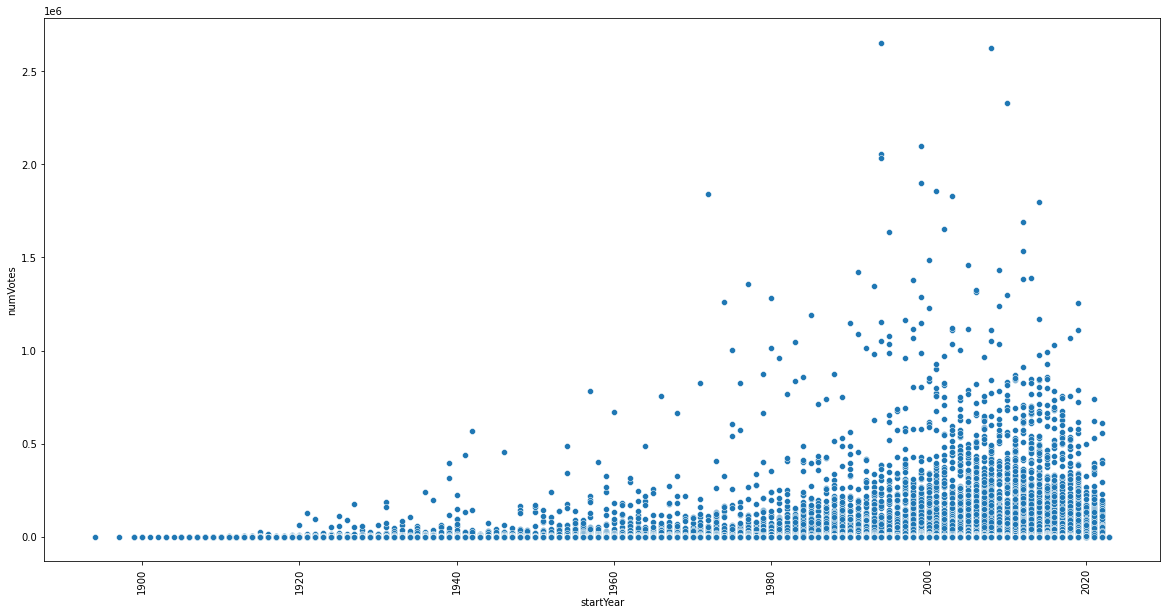

In [ ]:
t_p_r_n_11_1 = t_p_r_n_11.dropna(subset=['startYear'])
condition = t_p_r_n_11_1['startYear'] != "\\N"
t_p_r_n_11_2= t_p_r_n_11_1.loc[condition, :]

t_p_r_n_11_2['startYear']=pd.to_datetime(t_p_r_n_11_2['startYear'])
t_p_r_n_11_2.sort_values('startYear', ascending=True)

fig, ax1 = plt.subplots(figsize = (20,10), nrows=1, ncols=1)

plot1 = plt.subplot(111)
sns.scatterplot(ax=plot1, x = t_p_r_n_11_2['startYear'], y= t_p_r_n_11_2['numVotes'])
plt.xticks(rotation='vertical')

plt.show()

Scatterplot NrVotes of each movie per year (for the choosed sample)

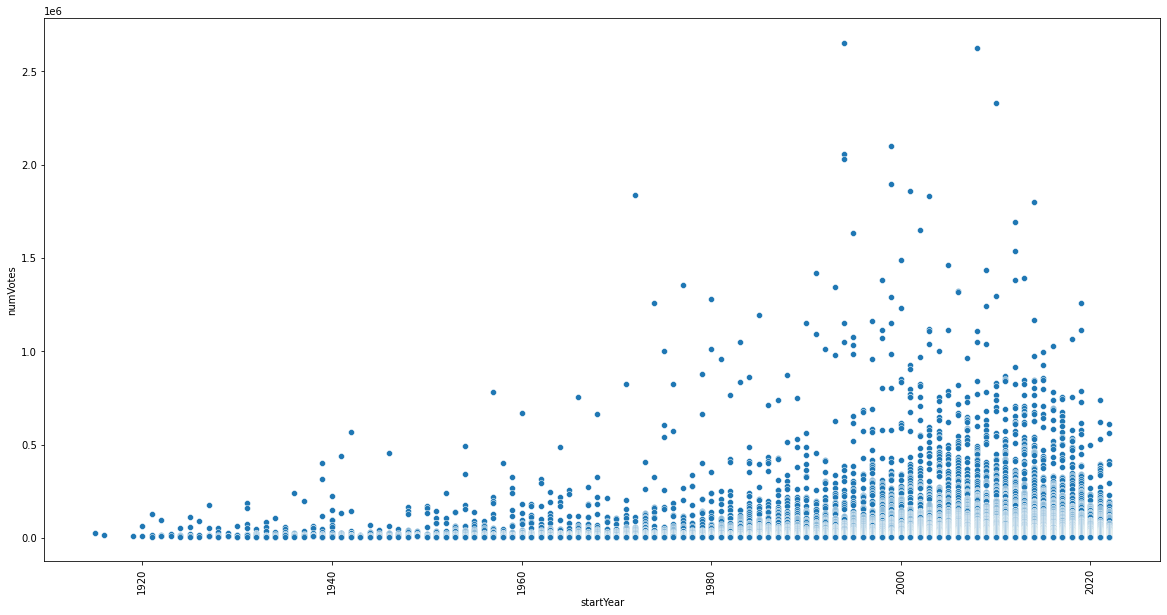

In [ ]:
t_p_r_n_12_1 = t_p_r_n_12.dropna(subset=['startYear'])
condition = t_p_r_n_12_1['startYear'] != "\\N"
t_p_r_n_12_2= t_p_r_n_12_1.loc[condition, :]

t_p_r_n_12_2['startYear']=pd.to_datetime(t_p_r_n_12_2['startYear'])
t_p_r_n_12_2.sort_values('startYear', ascending=True)

fig, ax1 = plt.subplots(figsize = (20,10), nrows=1, ncols=1)

plot1 = plt.subplot(111)
sns.scatterplot(ax=plot1, x = t_p_r_n_12_2['startYear'], y= t_p_r_n_12_2['numVotes'])
plt.xticks(rotation='vertical')

plt.show()

Boxplot of numbVotes of the choosed sample

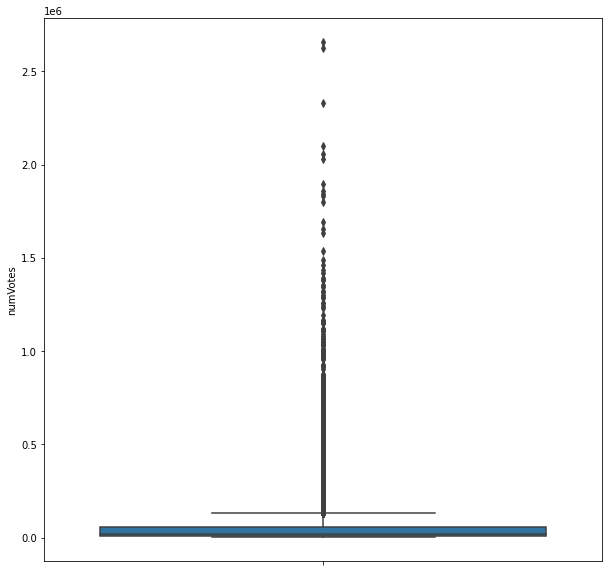

In [ ]:
fig, ax1 = plt.subplots(figsize = (10,10), nrows=1, ncols=1)

plot1 = plt.subplot(111)
sns.boxplot(ax=plot1, y= t_p_r_n_12['numVotes'])
plt.show()

Correlation beetween ratings and number of votes, on all movies dataset:

In [ ]:
t_p_r_n_11.corr()

,averageRating,numVotes
averageRating,1.0000,0.0649
numVotes,0.0649,1.0000


Correlation beetween ratings and number of votes, on 5% dataset:

In [ ]:
t_p_r_n_12.corr()

,averageRating,numVotes
averageRating,1.000000,0.251951
numVotes,0.251951,1.000000


Correlation beetween ratings and number of votes, on the top 1000 more voted movies from the 5% dataset:

In [ ]:
t_p_r_n_12.head(1000).corr()

,averageRating,numVotes
averageRating,1.000000,0.535336
numVotes,0.535336,1.000000
